In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from arch.__future__ import reindexing

In [18]:
gold_df = pd.read_csv('LBMA-GOLD.csv')
bitcoin_df = pd.read_csv('BCHAIN-MKPRU.csv')

# convert the column 'date' into datetime type
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df = gold_df.ffill()
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

gold = gold_df['USD (PM)']
bitcoin = bitcoin_df['Value']

gold.index = gold_df['Date']
bitcoin.index = bitcoin_df['Date']

# Time Series Analysis

## Bitcoin

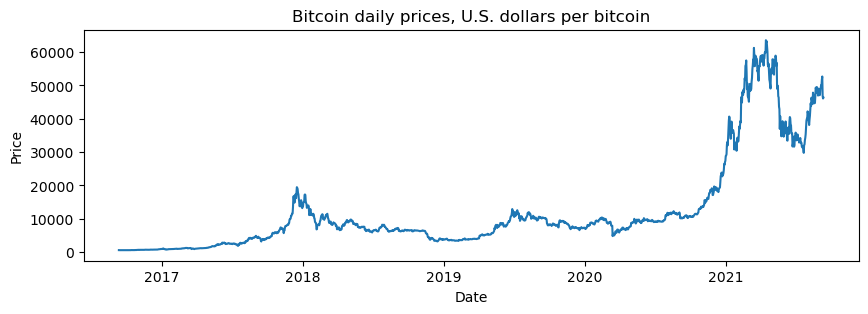

In [3]:
# plot the time series
plt.figure(figsize=(10, 3))
plt.plot(bitcoin)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin daily prices, U.S. dollars per bitcoin')
plt.show()

### ARIMA

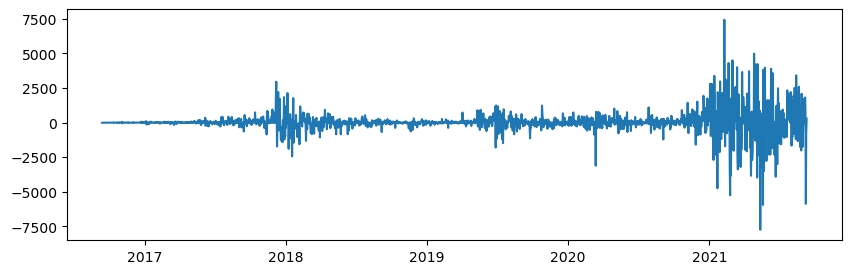

p-value: 1.01118318935687e-13


In [4]:
# differencing
diff_bitcoin = bitcoin.diff().dropna()

# Plot
plt.figure(figsize=(10, 3))
plt.plot(diff_bitcoin)
plt.show()

# ADF Test
_, pval, *_ = adfuller(diff_bitcoin)
print(f"p-value: {pval}")

In [5]:
diff_bitcoin

Date
2016-09-12     -11.98
2016-09-13       1.25
2016-09-14      -2.10
2016-09-15       1.56
2016-09-16      -1.27
               ...   
2021-09-06    1821.68
2021-09-07     908.34
2021-09-08   -5868.23
2021-09-09    -730.79
2021-09-10     290.31
Name: Value, Length: 1825, dtype: float64

In [6]:
# LB Test
acorr_ljungbox(diff_bitcoin, lags = [6, 12])

,lb_stat,lb_pvalue
6,21.895562,1.264781e-03
12,63.941901,4.274668e-09


Text(0, 0.5, 'Correlation')

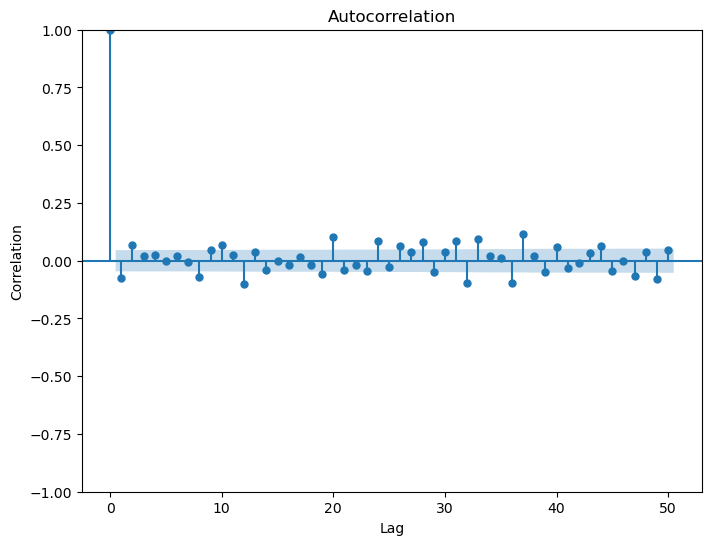

In [7]:
# Plot the ACF
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

plot_acf(diff_bitcoin, ax, lags = 50)
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation')

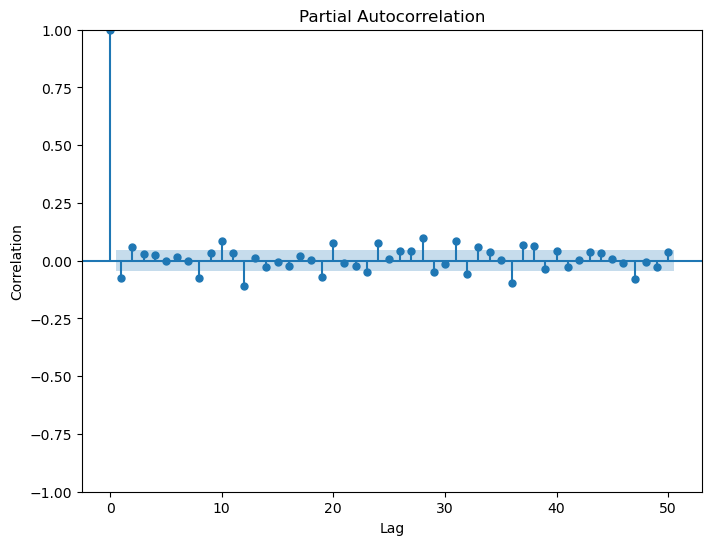

In [8]:
# Plot the PACF
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

plot_pacf(diff_bitcoin, ax, lags = 50)
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

In [9]:
# Select the best model to fit the time series, using AIC as the criterion
best_aic = np.inf
best_order = None

for p in range(5):
    for q in range(5):
        order = (p, 0, q)  
        try:
            model = ARIMA(diff_bitcoin, order = order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

print("Best ARIMA Order:", best_order)

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No f

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No f

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels

Best ARIMA Order: (2, 0, 4)


/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Fit the model
bitcoin_fitted = ARIMA(bitcoin, order = (2, 1, 4)).fit().get_prediction(start = 1, dynamic = False)
bitcoin_res = bitcoin_fitted.predicted_mean
bitcoin_res

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2016-09-12      603.440657
2016-09-13      624.391214
2016-09-14      624.016487
2016-09-15      603.314549
2016-09-16      599.699048
                  ...     
2021-09-06    49998.523189
2021-09-07    51734.877388
2021-09-08    52730.277515
2021-09-09    47273.812051
2021-09-10    45616.552616
Freq: D, Name: predicted_mean, Length: 1825, dtype: float64

### GARCH

In [16]:
# Residuals
bitcoin_rd = (bitcoin-bitcoin_res).dropna()
bitcoin_rd_sq = bitcoin_rd**2

# Portmanteau Q Test
acorr_ljungbox(bitcoin_rd, lags = [6, 12])

,lb_stat,lb_pvalue
6,8.737832,0.188868
12,34.702069,0.000522


In [14]:
best_aic = float('inf')
best_order = None

for p in range(1, 6):
    for q in range(1, 6):
        model = arch_model(bitcoin_rd, vol = 'Garch', p = p, q = q)
        result = model.fit(disp = 'off')
        aic = result.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)

print("Best GARCH Order (p, q):", best_order)

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estim

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/yipengliu/opt/anaconda3/lib/python3.9

Best GARCH Order (p, q): (3, 3)


/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [10]:
garch_bitcoin_rd = arch_model(bitcoin_rd, vol = 'Garch', p = 3, q = 3).fit()

# Fitted values of bitcoin residuals
plt.figure(figsize = (12, 6))
plt.plot(bitcoin_rd, label = 'Actual Residuals')
plt.plot(garch_bitcoin_rd.conditional_volatility, color = 'red', label = 'GARCH Fitted Volatility')
plt.title('Actual Residuals vs GARCH Fitted Volatility')
plt.legend()
plt.show()

NameError: name 'bitcoin_rd' is not defined

## Gold

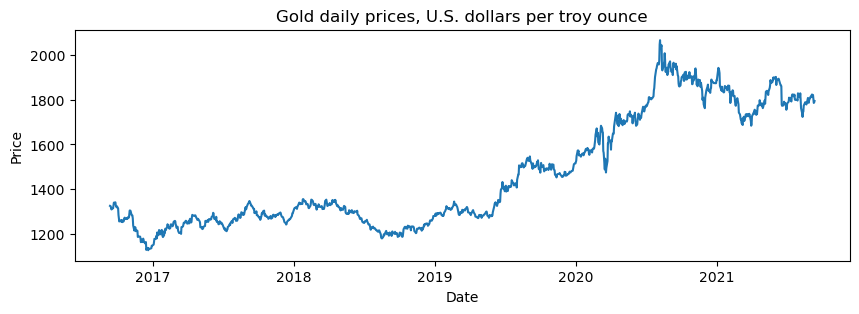

In [17]:
# plot the time series
plt.figure(figsize=(10, 3))
plt.plot(gold)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold daily prices, U.S. dollars per troy ounce')
plt.show()

### ARIMA

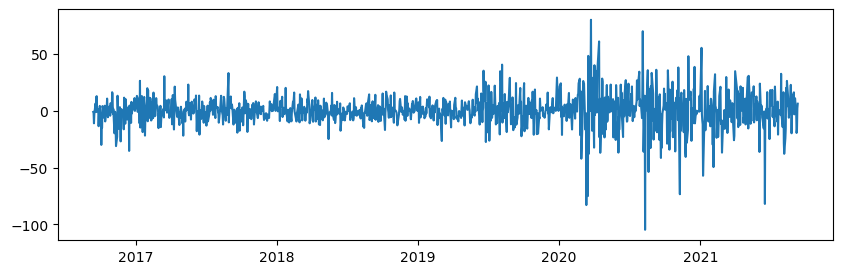

p-value: 1.3653159532611381e-12


In [18]:
# differencing
diff_gold = gold.diff().dropna()

# Plot
plt.figure(figsize=(10, 3))
plt.plot(diff_gold)
plt.show()

# ADF Test
_, pval, *_ = adfuller(diff_gold)
print(f"p-value: {pval}")

Text(0, 0.5, 'Correlation')

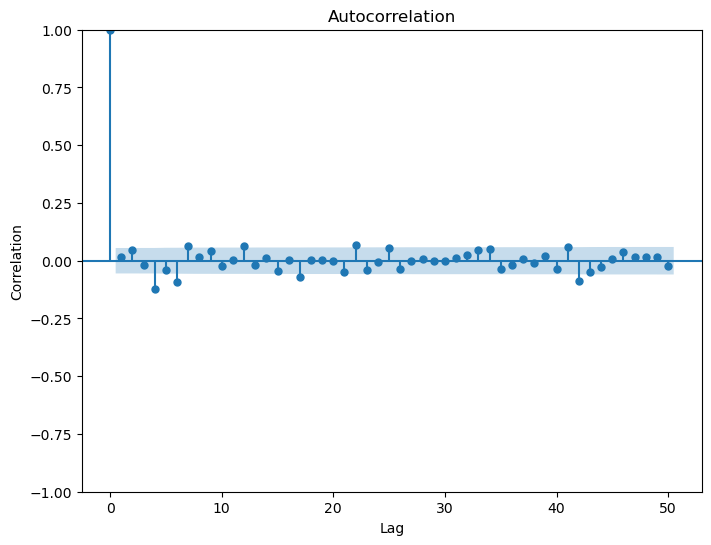

In [19]:
# Plot the ACF
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

plot_acf(diff_gold, ax, lags = 50)
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation')

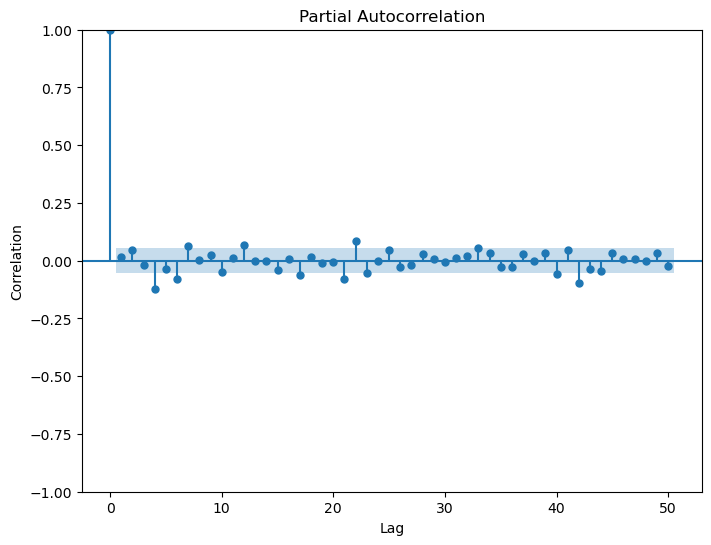

In [20]:
# Plot the PACF
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

plot_pacf(diff_gold, ax, lags = 50)
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

In [21]:
# LB Test
acorr_ljungbox(diff_gold, lags = [6, 12])

,lb_stat,lb_pvalue
6,34.867156,0.000005
12,48.234612,0.000003


In [22]:
# Select the best model to fit the time series, using AIC as the criterion
best_aic = np.inf
best_order = None

for p in range(5):
    for q in range(5):
        order = (p, 0, q)  
        try:
            model = ARIMA(diff_gold, order = order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

print("Best ARIMA Order:", best_order)

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information an

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information an

Best ARIMA Order: (4, 0, 4)


/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best model to fit the gold price is ARIMA(4, 1, 4)

/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

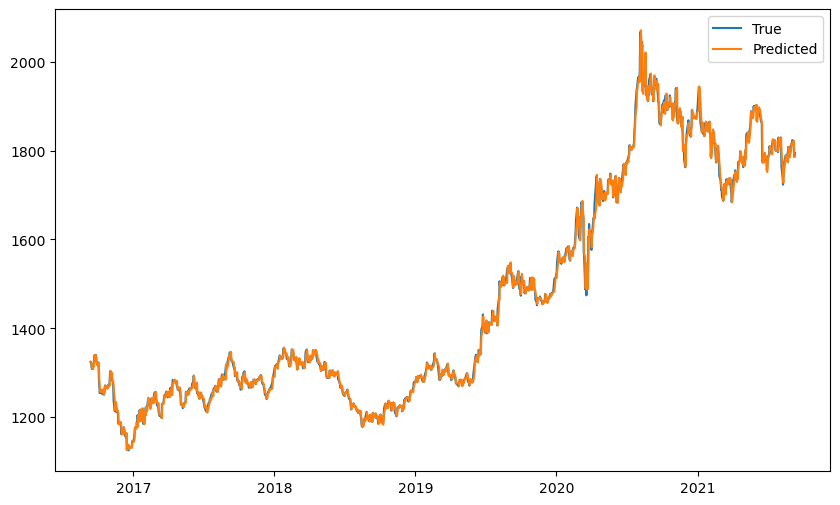

In [20]:
# Fit the model and plot it
gold_fitted = ARIMA(gold, order = (4, 1, 4)).fit().get_prediction(start = 1, dynamic = False)
gold_res = gold_fitted.predicted_mean

plt.figure(figsize=(10, 6))
plt.plot(gold)
plt.plot(gold_res)
plt.legend(['True', 'Predicted'])
plt.show()

In [21]:
# Check the fitted value of gold
gold_res

Date
2016-09-13    1324.607332
2016-09-14    1323.629938
2016-09-15    1321.660459
2016-09-16    1310.432912
2016-09-19    1308.077372
                 ...     
2021-09-06    1821.489274
2021-09-07    1822.020962
2021-09-08    1798.843253
2021-09-09    1785.381230
2021-09-10    1787.594445
Name: predicted_mean, Length: 1264, dtype: float64

In [22]:
# the residual after fitting
acorr_ljungbox((gold-gold_res).dropna(), lags = [6, 12])

,lb_stat,lb_pvalue
6,2.500875,0.868370
12,13.915858,0.306114


# Trading Strategy

In [37]:
# Merge the data set
all_df = pd.merge(gold_df, bitcoin_df, how = 'outer', on = 'Date').sort_values("Date").reset_index()
all_df.rename(columns = {'USD (PM)': 'Gold Price', 'Value': 'Bitcoin Price'}, inplace = True)
all_df.drop('index', axis = 1, inplace = True)
all_df

,Date,Gold Price,Bitcoin Price
0,2016-09-11,NaN,621.65
1,2016-09-12,1324.60,609.67
2,2016-09-13,1323.65,610.92
3,2016-09-14,1321.75,608.82
4,2016-09-15,1310.80,610.38
...,...,...,...
1821,2021-09-06,1821.60,51769.06
1822,2021-09-07,1802.15,52677.40
1823,2021-09-08,1786.00,46809.17
1824,2021-09-09,1788.25,46078.38


In [38]:
# Construct the data frame
gold_res_df = gold_res.reset_index()
bitcoin_res_df = bitcoin_res.reset_index()
gold_res_df.columns = ['Date', 'Gold Price (Predicted)']
bitcoin_res_df.columns = ['Date', 'Bitcoin Price (Predicted)']

predicted_df = pd.merge(bitcoin_res_df, gold_res_df, on = 'Date', how = 'left')
all_df = pd.merge(all_df, predicted_df, on = 'Date', how = 'left')

In [41]:
all_df.loc[all_df['Gold Price'].isna(), 'Gold Price (Predicted)'] = np.nan
all_df = all_df.drop(0).reset_index(drop=True)
all_df

,Date,Gold Price,Bitcoin Price,Bitcoin Price (Predicted),Gold Price (Predicted)
0,2016-09-12,1324.60,609.67,603.440657,NaN
1,2016-09-13,1323.65,610.92,624.391214,1324.607332
2,2016-09-14,1321.75,608.82,624.016487,1323.629938
3,2016-09-15,1310.80,610.38,603.314549,1321.660459
4,2016-09-16,1308.35,609.11,599.699048,1310.432912
...,...,...,...,...,...
1820,2021-09-06,1821.60,51769.06,49998.523189,1821.489274
1821,2021-09-07,1802.15,52677.40,51734.877388,1822.020962
1822,2021-09-08,1786.00,46809.17,52730.277515,1798.843253
1823,2021-09-09,1788.25,46078.38,47273.812051,1785.381230


In [26]:
# Genetic Algorithm to solve the optimization problem
from sko.operators import ranking, selection, crossover, mutation
from sko.GA import GA

# Trade Bitcoin and gold
def ga_1(h1, h2, m1, m2, n1, n2):

    demo_func = lambda x: -((n1 / m1) * (h1 + x[0]) + (n2 / m2) * (h2 + x[1]))

    constraint_ueq = [
        lambda x: x[0] + x[1] - (h1 + h2),
        lambda x: (-h1 - h2) - (x[0] + x[1]),
        lambda x: ((n1 / m1) - 1) - 0.01,
        lambda x: ((n2 / m2) - 0.02)
    ]

    ga = GA(func = demo_func,  
            n_dim = 2,  
            size_pop = 100,  
            max_iter = 500,  
            prob_mut = 0.001,  
            lb = [-h1, -h2], 
            ub = [h1, h2],  
            precision = [1e-7, 1e-7], 
            constraint_ueq = constraint_ueq  
            )

    ga.register(operator_name = 'selection', operator = selection.selection_roulette_2)
    ga.register(operator_name = 'ranking', operator = ranking.ranking)
    ga.register(operator_name = 'crossover', operator = crossover.crossover_2point_bit)
    ga.register(operator_name = 'mutation', operator = mutation.mutation)

    best_x, func = ga.run()

    return -func[0], best_x[0], best_x[1]

In [27]:
# Only trade Bitcoin
def ga_2(h1, h2, m2, n2):

    demo_func = lambda x: -(h1 + (n2 / m2) * (h2 + x[0]))

    constraint_ueq = [
        lambda x: x[0] - h2,
        lambda x: - h2 - x[0],
        lambda x: 0.02  - ((n2 / m2) - 1)
    ]
    
    ga = GA(func = demo_func, 
            n_dim = 1, 
            size_pop = 100, 
            max_iter = 500,
            prob_mut = 0.001,
            lb = [-h1], 
            ub = [h1], 
            precision = [1e-7], 
            constraint_ueq = constraint_ueq)

    ga.register(operator_name = 'selection', operator = selection.selection_roulette_2)
    ga.register(operator_name = 'ranking', operator = ranking.ranking)
    ga.register(operator_name = 'crossover', operator = crossover.crossover_2point_bit)
    ga.register(operator_name = 'mutation', operator = mutation.mutation)
    
    best_x, func = ga.run()
    
    return -func[0],best_x[0]

In [42]:
h1 = h2 = 500
strategy_df = []

# Trading Strategy
for i in range(1, all_df.shape[0]):
    
    if i == all_df.shape[0]-1:
        break

    m1 = all_df['Gold Price'].iloc[i]
    m2 = all_df['Bitcoin Price'].iloc[i]
    n1 = all_df['Gold Price (Predicted)'].iloc[i]
    n2 = all_df['Bitcoin Price (Predicted)'].iloc[i]
    N1 = all_df['Gold Price'].iloc[i+1]
    N2 = all_df['Bitcoin Price'].iloc[i+1] 
        
    if (np.isnan(m1) == True) or (np.isnan(n1) == True):
        prop, bc = ga_2(h1, h2, m2, n2)
        h2 = N2 / m2 * (h2 + bc)
        strategy_df.append([all_df['Date'].iloc[i], m1, m2, n1, n2, N1, N2, h1, h2, np.nan, bc, prop])
    else:
        prop, g, bc = ga_1(h1, h2, m1, m2, n1, n2)
        if (np.isnan(N1) == True) or (np.isnan(N2) == True):
            pass
        else:
            h1 = N1 / m1 * (h1 + g) 
            h2 = N2 / m2 * (h2 + bc)
        strategy_df.append([all_df['Date'].iloc[i], m1, m2, n1, n2, N1, N2, h1, h2, g, bc, prop])
            
    if h1 == 0 or np.isnan(h1) == True :
        h1 = 0.0001

2/1826
3/1826
4/1826
5/1826
6/1826
7/1826
8/1826
9/1826
10/1826
11/1826
12/1826
13/1826
14/1826
15/1826
16/1826
17/1826
18/1826
19/1826
20/1826
21/1826
22/1826
23/1826
24/1826
25/1826
26/1826
27/1826
28/1826
29/1826
30/1826
31/1826
32/1826
33/1826
34/1826
35/1826
36/1826
37/1826
38/1826
39/1826
40/1826
41/1826
42/1826
43/1826
44/1826
45/1826
46/1826
47/1826
48/1826
49/1826
50/1826
51/1826
52/1826
53/1826
54/1826
55/1826
56/1826
57/1826
58/1826
59/1826
60/1826
61/1826
62/1826
63/1826
64/1826
65/1826
66/1826
67/1826
68/1826
69/1826
70/1826
71/1826
72/1826
73/1826
74/1826
75/1826
76/1826
77/1826
78/1826
79/1826
80/1826
81/1826
82/1826
83/1826
84/1826
85/1826
86/1826
87/1826
88/1826
89/1826
90/1826
91/1826
92/1826
93/1826
94/1826
95/1826
96/1826
97/1826
98/1826
99/1826
100/1826
101/1826
102/1826
103/1826
104/1826
105/1826
106/1826
107/1826
108/1826
109/1826
110/1826
111/1826
112/1826
113/1826
114/1826
115/1826
116/1826
117/1826
118/1826
119/1826
120/1826
121/1826
122/1826
123/1826
124/1826

925/1826
926/1826
927/1826
928/1826
929/1826
930/1826
931/1826
932/1826
933/1826
934/1826
935/1826
936/1826
937/1826
938/1826
939/1826
940/1826
941/1826
942/1826
943/1826
944/1826
945/1826
946/1826
947/1826
948/1826
949/1826
950/1826
951/1826
952/1826
953/1826
954/1826
955/1826
956/1826
957/1826
958/1826
959/1826
960/1826
961/1826
962/1826
963/1826
964/1826
965/1826
966/1826
967/1826
968/1826
969/1826
970/1826
971/1826
972/1826
973/1826
974/1826
975/1826
976/1826
977/1826
978/1826
979/1826
980/1826
981/1826
982/1826
983/1826
984/1826
985/1826
986/1826
987/1826
988/1826
989/1826
990/1826
991/1826
992/1826
993/1826
994/1826
995/1826
996/1826
997/1826
998/1826
999/1826
1000/1826
1001/1826
1002/1826
1003/1826
1004/1826
1005/1826
1006/1826
1007/1826
1008/1826
1009/1826
1010/1826
1011/1826
1012/1826
1013/1826
1014/1826
1015/1826
1016/1826
1017/1826
1018/1826
1019/1826
1020/1826
1021/1826
1022/1826
1023/1826
1024/1826
1025/1826
1026/1826
1027/1826
1028/1826
1029/1826
1030/1826
1031/1826
1032/

1752/1826
1753/1826
1754/1826
1755/1826
1756/1826
1757/1826
1758/1826
1759/1826
1760/1826
1761/1826
1762/1826
1763/1826
1764/1826
1765/1826
1766/1826
1767/1826
1768/1826
1769/1826
1770/1826
1771/1826
1772/1826
1773/1826
1774/1826
1775/1826
1776/1826
1777/1826
1778/1826
1779/1826
1780/1826
1781/1826
1782/1826
1783/1826
1784/1826
1785/1826
1786/1826
1787/1826
1788/1826
1789/1826
1790/1826
1791/1826
1792/1826
1793/1826
2021-08-10 00:00:00
2021-08-11 00:00:00
2021-08-12 00:00:00
2021-08-13 00:00:00


/Users/yipengliu/opt/anaconda3/lib/python3.9/site-packages/sko/GA.py:148: RuntimeWarning: overflow encountered in true_divide
  Lind_raw = np.log2((self.ub - self.lb) / self.precision + 1)


1798/1826
1799/1826
2021-08-16 00:00:00
2021-08-17 00:00:00
2021-08-18 00:00:00
2021-08-19 00:00:00
2021-08-20 00:00:00
1805/1826
1806/1826
2021-08-23 00:00:00
2021-08-24 00:00:00
2021-08-25 00:00:00
2021-08-26 00:00:00
2021-08-27 00:00:00
1812/1826
1813/1826
1814/1826
2021-08-31 00:00:00
2021-09-01 00:00:00
2021-09-02 00:00:00
2021-09-03 00:00:00
1819/1826
1820/1826
2021-09-06 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-09-09 00:00:00


In [44]:
select_df = pd.DataFrame(strategy_df).filter([0, 9, 10, 11])

In [46]:
select_df.rename(columns = {0: 'Date', 9: 'Gold Transaction', 10: 'Bitcoin Transaction', 11: 'Asset'})

,Date,Gold Transaction,Bitcoin Transaction,Asset
0,2016-09-13,499.937061,4.999597e+02,2.022670e+03
1,2016-09-14,998.485712,9.962108e+02,4.042301e+03
2,2016-09-15,1980.335380,1.997826e+03,7.943009e+03
3,2016-09-16,3952.752423,3.986584e+03,1.576945e+04
4,2016-09-17,NaN,3.953376e+03,1.204132e+04
...,...,...,...,...
1796,2021-08-28,NaN,6.338524e+08,1.309886e+301
1797,2021-08-29,NaN,5.539363e+08,1.357994e+301
1798,2021-08-30,NaN,-5.728664e+06,1.369817e+301
1799,2021-09-04,NaN,1.389389e+08,1.296878e+301
